### lab4
----------------
Метод Монте-Карло

### task



- По методу Монте-Карло вычислить приближенное значения интегралов.
- Сравнить полученное значение либо с точным значением (если его получится вычислить), либо с приближенным, полученным в каком-либо математическом пакете (например, в Mathematica). Для этого построить график зависимости точности вычисленного методом Монте-Карло интеграла от числа итераций n.

In [1]:
import sys

import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

from scipy.stats import cauchy, norm, expon
from math import e, pow, sqrt
from random import uniform

import matplotlib

from IPython.display import Image

### integral

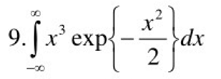

In [2]:
Image("lab4.png")

### определим подинтегральныю функцию и вычислим приближенное значение интеграла

In [3]:
def integrand_1(x):
    return   e**(-0.5 * x**2) * x ** 3 

integral_real_value = integrate.quad(integrand_1, -np.inf, np.inf)[0]
integral_real_value

0.0

### подынтегральная функция

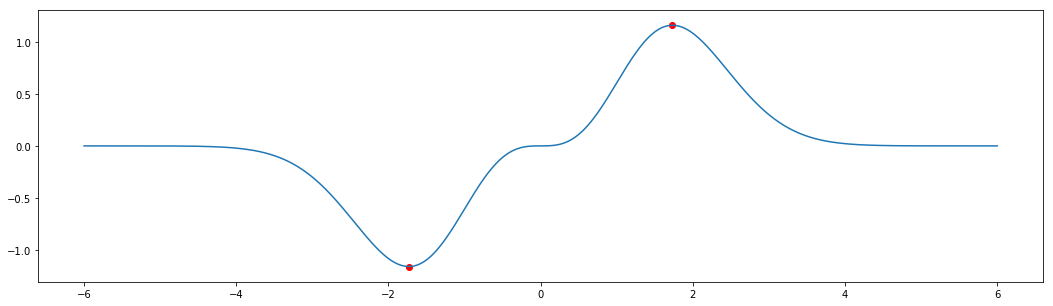

In [4]:
plt.figure(figsize=(18, 5))
x = np.linspace(-6,6,1000) #  linearly spaced numbers
y = [integrand_1(x_i) for x_i in x]
plt.plot(x,y)


loc_min = (-1)* (3 ** 0.5)
loc_max = (3 ** 0.5)

plt.scatter([loc_min, loc_max],[integrand_1(loc_min), integrand_1(loc_max)] ,color = 'red')
plt.show()


###  так как значение интеграла рано 0. выберем нормальное распределение для метода монте-карло

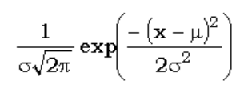

In [5]:
Image("lab4_img5.png")

### определим распределение с параметрамаи подходящими нашему интегралу

In [6]:
cur_distribution = norm


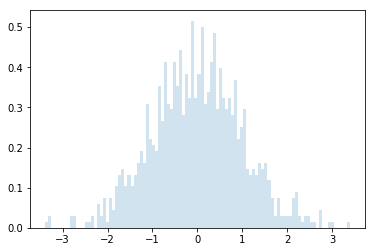

In [12]:
fig, ax = plt.subplots(1, 1)
r = cur_distribution.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2,bins = 100)
plt.show()

### функция вычисления интеграла по методу Монте-Карло

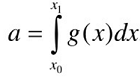

In [13]:
integral_img = Image("lab4_img1.png")
value_img = Image("lab4_img2.png")
mean_var_img = Image("lab4_img3.png")
point_estimation_image = mean_var_img = Image("lab4_img4.png")
integral_img

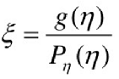

In [14]:
value_img

### тогда МО получившейся СВ равно искомому интегралу
### дисперссию расчитем по формуле

In [15]:
from math import pi

In [16]:
def func_theory_var(x):
    return  ( ( 2*pi)**0.5 ) * x**6 * e**(-0.5 * x**2)

theory_var = integrate.quad(func_theory_var, -np.inf, np.inf)[0]

print('значение дисперсии СВ кси: ', theory_var)

значение дисперсии СВ кси:  94.24777960769379


In [17]:
def generate_value(n, integral = integrand_1, distribution= cur_distribution):
    """
    return: list of sample data ksi
    """
    values= distribution.rvs(size=n)
    distr = distribution.pdf
    return [integral(el) / distr(el) for el in values]
    

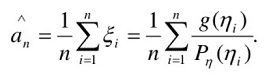

In [18]:
point_estimation_image

In [46]:
def calc_monte_carlo(n ,integral = integrand_1, distribution= cur_distribution):
    """
    return:  val of integral counted by Monte-Carlo
    that is equal to point estimation
    """
    values= distribution.rvs(size=n)
    distr = distribution.pdf
    xx = [integral(el) / distr(el) for el in values]
    return sum(xx)/ len(values)

In [47]:

calc_monte_carlo(10000)

-0.17224698504348795

### Серия эксперементов и графики

In [48]:
def mean_integral_val(func,n, number_of_tests = 5):
    return sum([func(n) for _ in range(number_of_tests)]) / number_of_tests


# list of integral values for diffrent num of iterations
list_integrals = [mean_integral_val(calc_monte_carlo,i) for i in range(1,10000,100)] 
list_num = range(1,10000,100)

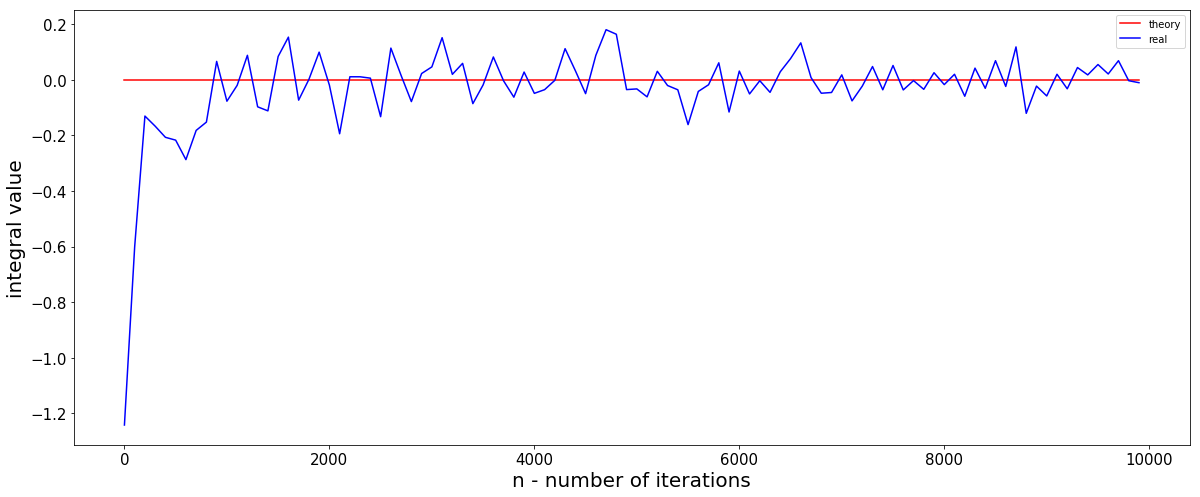

In [49]:

def draw(real, theory,thicks):
    matplotlib.rc('ytick', labelsize=15)
    matplotlib.rc('xtick', labelsize=15)
    plt.figure(figsize=(20, 8))

    
    plt.plot(thicks, [theory] * len(real), label='theory', color = 'red')
    plt.plot(thicks, real, label='real', color = 'blue')
    error = [theory_var ** 0.5 / x for x in thicks]
    #plt.plot(thicks, error, color = 'g', label='var ** 0.5 / n')
    # plt.xscale('log')
 
    plt.xlabel('n - number of iterations', fontsize=20)
    plt.ylabel('integral value', fontsize=20)
    plt.legend()
    plt.show()

draw(list_integrals, integral_real_value,list_num )

### Доверительный интервал

mean


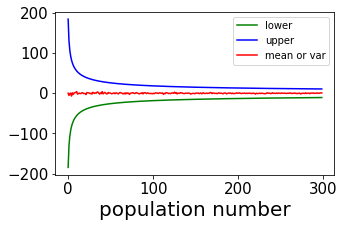

In [50]:
from lab1.graph import draw_autocorr,draw_cdf,draw_freq,draw_intervals,draw_scatter

lower = []
upper = []
lower_var = []
upper_var = []
means_theory = []
vars_theory = []


var = theory_var # дисперссия для СВ кси, а не ню
mean = 0

for num in range(1,300):
    
    data = generate_value(num) 
      
    lower.append(mean - 1.96 * var / num ** 0.5)
    upper.append(mean + 1.96 * var / num ** 0.5)

    means_theory.append(np.mean(data))
    vars_theory.append(np.var(data))

print('mean')
draw_intervals(lower,upper,means_theory)
